# Sentiment Analysis on Restaurant

In [1]:
import pandas as pd
import numpy as np

In [4]:
data=pd.read_excel(r"C:\Users\GIS\Desktop\wps_download\Restaurant_Reviews.xlsx")

In [6]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


## About the data 
- The notebook deals with Sentiment Analysis

In [7]:
import nltk
import re
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\GIS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [9]:
# cleaning reviews

In [15]:
corpus=[]
for i in range(0,1000):
    review=re.sub(pattern='[^a-zA-Z]',repl=' ',string=data['Review'][i])
    review=review.lower()
    review_words=review.split()
    review_words=[word for word in review_words if not word in set(stopwords.words('english'))]
    ## stemming of words
    ps=PorterStemmer()
    review=[ps.stem(word) for word in review_words]
    ## joining the stemmed words
    review=' '.join(review)
    #corpus creation 
    corpus.append(review)

In [17]:
corpus[:1500]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place acc

In [18]:
# count vectorization

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
cv=CountVectorizer(max_features=1500)
x=cv.fit_transform(corpus).toarray()
y=data.iloc[:,1].values

In [22]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [23]:
y

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [25]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((800, 1500), (200, 1500), (800,), (200,))

In [26]:
## model training

In [27]:
# we use MultinomialNB 

In [28]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
classifier.fit(x_train,y_train)

MultinomialNB()

In [29]:
# predict the test results
y_pred=classifier.predict(x_test)

In [30]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1], dtype=int64)

In [31]:
# accuracy 

In [34]:
from sklearn.metrics import recall_score,accuracy_score,precision_score

In [35]:
score1=accuracy_score(y_test,y_pred)
score2=precision_score(y_test,y_pred)
score3=recall_score(y_test,y_pred)

In [36]:
score1

0.765

In [37]:
score2

0.7641509433962265

In [38]:
score3

0.7864077669902912

In [39]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [40]:
cm

array([[72, 25],
       [22, 81]], dtype=int64)

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

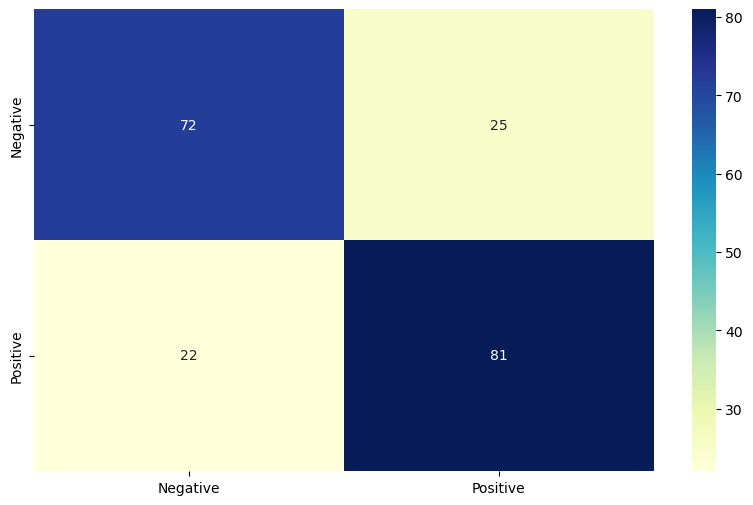

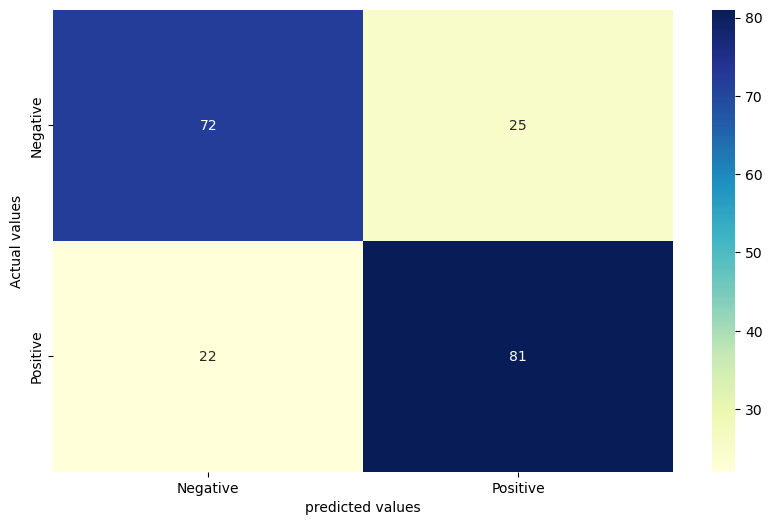

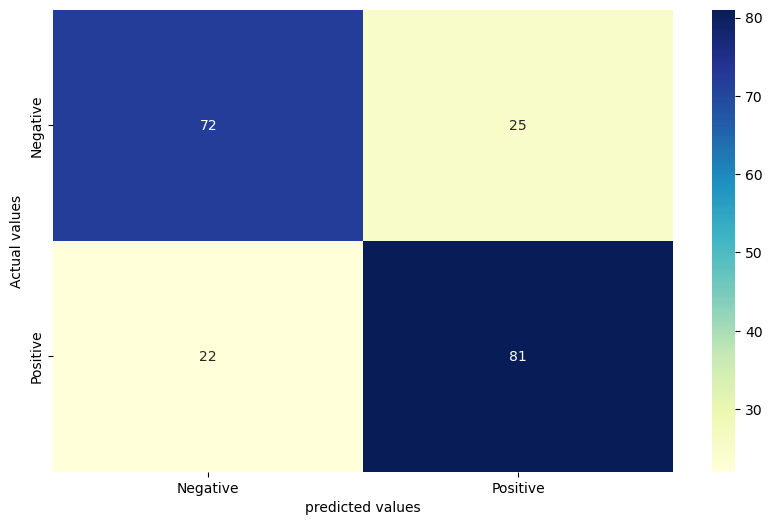

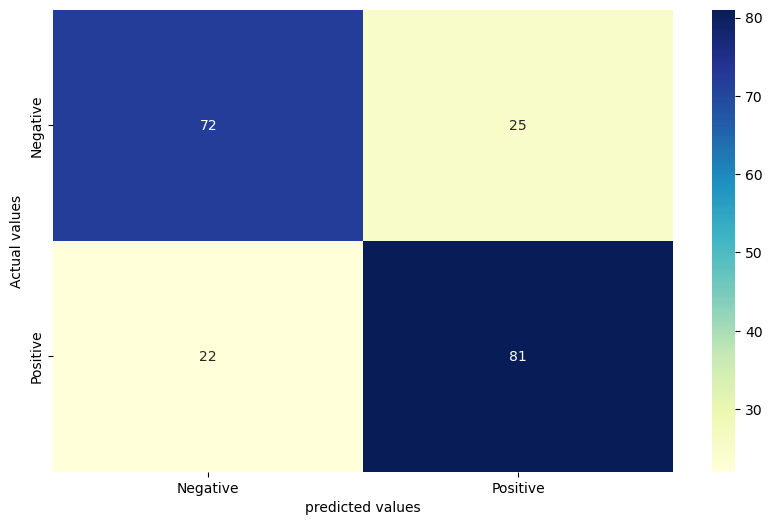

In [45]:
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,cmap='YlGnBu',xticklabels=['Negative','Positive'],yticklabels=['Negative','Positive'])
plt.xlabel('predicted values')
plt.ylabel('Actual values')
plt.show()

In [46]:
# hypertuning

In [53]:
best_accuracy=0.0
alpha_value=0.0
for i in np.arange(0.1,1.1,0.1):
    temp_classifier=MultinomialNB(alpha=1)
    temp_classifier.fit(x_train,y_train)
    temp_y_pred=temp_classifier.predict(x_test)
    score=accuracy_score(y_test,temp_y_pred)
    print('accueracy for alpha {} is {}%'.format(round(i,1),round(score*100,2)))
    if score>best_accuracy:
        best_accuracy=score
        alpha_value=i
print('the best accuracy is {}% for alpha value{}'.format(round(best_accuracy*100,2),round(alpha_value,1)))

accueracy for alpha 0.1 is 76.5%
accueracy for alpha 0.2 is 76.5%
accueracy for alpha 0.3 is 76.5%
accueracy for alpha 0.4 is 76.5%
accueracy for alpha 0.5 is 76.5%
accueracy for alpha 0.6 is 76.5%
accueracy for alpha 0.7 is 76.5%
accueracy for alpha 0.8 is 76.5%
accueracy for alpha 0.9 is 76.5%
accueracy for alpha 1.0 is 76.5%
the best accuracy is 76.5% for alpha value0.1


In [64]:
def predict_sentiment(sample):
    sample=re.sub(pattern='[^a-zA-Z]',repl=' ',string=sample)
    sample=sample.lower()
    sample_words=sample.split()
    sample_words=[word for word in sample_words if not word in set(stopwords.words('english'))]
    ps=PorterStemmer()
    final_review=[ps.stem(word) for word in sample_words]
    final_review=' '.join(final_review)
    temp=cv.transform([final_review]).toarray()
    return classifier.predict(temp)

In [55]:
#predict sample values

In [67]:
sample='The food is really bad'
if predict_sentiment(sample):
    print('this is a positive review')
else:
    print('this is a negative review')

this is a negative review


In [65]:
sample='The food was pretty bad and the service was low'
if predict_sentiment(sample):
    print('this is a positive review')
else:
    print('this is a negative review')

this is a negative review


In [68]:
sample='The food was absolutely wonderful ,from preparation to presentation ,very pleasing'
if predict_sentiment(sample):
    print('this is a positive review')
else:
    print('this is a negative review')

this is a positive review
